In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord

from plato.instrument.platopoint import platopoint

In [16]:
source = SkyCoord(
    l=267.949029,
    b=0.0,
    frame="galactic",
    unit=(u.deg, u.deg),
)
platopoint(
    targetCoord=source.icrs,
    rotationAngle=np.deg2rad(13.943091582693294),
    focalLength=250.30913130717633,
)

({1: '2', 2: None, 3: None, 4: None},
 {1: 4376.548850450918, 2: None, 3: None, 4: None},
 {1: 3061.0460012179396, 2: None, 3: None, 4: None})

In [52]:
np.sqrt((1480.41501219427) ** 2 + (4510) ** 2)

4746.759800993743

In [246]:
4510 - 4083.297151103282

426.702848896718

In [ ]:
426.702848896718

In [20]:
source = SkyCoord(l=255.93750771, b=0, frame="galactic", unit=(u.deg, u.deg))
platopoint(targetCoord=source.icrs, nCamera=1)[0]

-2848.632852613332 8638.194932500546
3983.7504880560996 7358.632852613332
2704.1884081688872 526.2495119439
-4128.194932500545 1805.8115918311123


{1: '3'}

In [29]:
source = SkyCoord(l=255.93750771, b=1, frame="galactic", unit=(u.deg, u.deg))
platopoint(targetCoord=source.icrs, nCamera=2)[0]

-57.645449589455204 8759.284881042662
4104.840436598217 4567.645449589456
-86.79899485498974 405.1595634017839
-4249.28488104266 4596.798994854989


{2: None}

In [204]:
b = 2.14
rotationAngle = np.deg2rad(13.9431)
source = SkyCoord(l=255.93750771 + 10, b=b, frame="galactic", unit=(u.deg, u.deg))
print(platopoint(targetCoord=source.icrs, rotationAngle=rotationAngle))
source = SkyCoord(l=255.93750771 - 10, b=b, frame="galactic", unit=(u.deg, u.deg))
print(platopoint(targetCoord=source.icrs, rotationAngle=rotationAngle))

({1: '2', 2: None, 3: None, 4: None}, {1: 4509.716962266847, 2: None, 3: None, 4: None}, {1: 3638.3189093473243, 2: None, 3: None, 4: None})
({1: None, 2: '3', 3: None, 4: None}, {1: None, 2: 871.6793497580342, 3: None, 4: None}, {1: None, 2: 0.2823011524108034, 3: None, 4: None})


In [198]:
platopoint(targetCoord=source.icrs, rotationAngle=rotationAngle)[1][1]

4509.716962266847

In [193]:
platopoint(targetCoord=source.icrs, rotationAngle=rotationAngle)[2][2]

0.2823011524108034

In [228]:
b = 2


def ang(r):
    r = np.deg2rad(r)
    source1 = SkyCoord(l=255.93750771 + 10, b=b, frame="galactic", unit=(u.deg, u.deg))
    source2 = SkyCoord(l=255.93750771 - 10, b=b, frame="galactic", unit=(u.deg, u.deg))
    f1 = platopoint(targetCoord=source1.icrs, rotationAngle=r)[1][1]
    f2 = platopoint(targetCoord=source2.icrs, rotationAngle=r)[2][2]
    print(f1, f2)
    if f1 is None or f2 is None:
        return 1e6
    return 4510 - np.abs(f1 + f2)

In [229]:
ang(13)

None 77.1104630560752


1000000.0

In [230]:
ang(13.93)

4475.377762438801 35.76576985874011


-1.1435322975412419

In [32]:
# find root of ang, is somewhere around 13.9431
from scipy.optimize import root_scalar

root_scalar(ang, bracket=[13.9, 14], method="brentq")

NameError: name 'ang' is not defined

In [218]:
f1 + f2

NameError: name 'f1' is not defined

In [22]:
from scipy.optimize import root_scalar


def fl(f):
    source = SkyCoord(
        l=267.949029,
        b=0.0,
        frame="galactic",
        unit=(u.deg, u.deg),
    )
    y = platopoint(
        targetCoord=source.icrs,
        rotationAngle=np.deg2rad(13.943091582693294),
        focalLength=f,
    )[1]

    if y is None:
        o = -5
        return -5
    elif y[1] is None:
        o = -5
        return -5
    else:
        o = 4510 - y[1]
    print(o)
    return o

In [ ]:
fl

In [27]:
root_scalar(fl, bracket=[230, 270], method="brentq")

494.4075213708088
142.50421202125835
57.5105309606397
18.412864927589908
10.725851336161213
5.482906885128614
4.204577919275835
4.202368134498101
4.201054218559875
4.200397260588943
4.2000687816043865
4.199993802039899
4.199949172076231
4.199926857094397
4.199921763505699
4.19992037936845
4.199919555460838
4.199919367398252
4.199919356747159
4.199919355426573
4.199919354638951
4.199919354246958
4.1999193540486885


      converged: True
           flag: converged
 function_calls: 49
     iterations: 48
           root: 257.58142350248204
         method: brentq

In [3]:
import pandas as pd
from plato.instrument import find_targets

field = "LOPS2"
data = pd.read_csv(f"../data/processed/all_sky_targets.csv", low_memory=False)

# add n_cameras column for field
data_2 = find_targets(data, field=field)

Field Center: RA = 95.310 Dec = -47.887 deg.
Rotation Angle: 13.943 deg.



Targets: 100%|██████████| 2283538/2283538 [31:59<00:00, 1189.94it/s]


In [4]:
data_2 = data_2[data_2["n_cameras"] > 0]
targets = data_2[["GLON", "GLAT", "n_cameras", "Population"]].copy()  # type: ignore

# wrap GLON at 180 degrees, convert to radians, and mirror on the y axis to comply with
# conventional Galactic coordinate system, and the projection plotting in matplotlib
targets["GLON"] = -np.deg2rad((targets["GLON"] + 180) % 360 - 180)
targets["GLAT"] = np.deg2rad(targets["GLAT"])

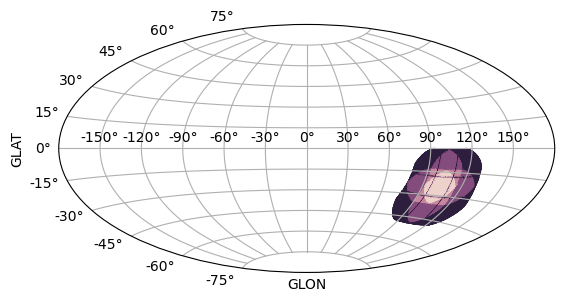

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from plato.visualisation.utilities import get_palette

with sns.plotting_context(font_scale=1.5):
    fig = plt.figure()
    field_plot = fig.add_subplot(111, projection="aitoff")

    sns.scatterplot(
        data=targets[targets["n_cameras"] > 0],
        x="GLON",
        y="GLAT",
        c=targets[targets["n_cameras"] > 0]["n_cameras"],
        cmap=get_palette(n_colors=4, as_cmap=True, reverse=True),
        linewidth=0,
        s=0.8,
        ax=field_plot,
        rasterized=True,
        alpha=0.6,
        zorder=-1,
    )
    field_plot.grid(True)